In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib

In [2]:
df=pd.read_csv(r'Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.shape

(13320, 9)

1. Data Cleaning

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.groupby('balcony')['balcony'].agg('count')

balcony
0.0    1029
1.0    4897
2.0    5113
3.0    1672
Name: balcony, dtype: int64

In [6]:
df1=df.drop(['availability','society','area_type'],axis=1)

In [7]:
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [9]:
df1.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
df1['size'].fillna(df1['size'].mode()[0],inplace=True)
df1['bath'].fillna(df1['bath'].median(),inplace=True)
df1['location'].fillna(df1['location'].mode()[0],inplace=True)
df1['balcony'].fillna(df1['balcony'].mode()[0],inplace=True)

In [11]:
df1['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df1['BHK']=df1['size'].apply(lambda x: int(x.split(' ')[0]))

In [13]:
df1.head(5)

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
df1=df1.drop(['size'],axis=1)

In [15]:
#df1.dropna(axis=0,inplace=True)

In [16]:
df1.shape

(13320, 6)

In [17]:
df1.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4
2,Uttarahalli,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3
4,Kothanur,1200,2.0,1.0,51.00,2


In [18]:
df1['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
df1[df1.BHK>20]

,location,total_sqft,bath,balcony,price,BHK
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


In [20]:
df1.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [22]:
df1[~df1['total_sqft'].apply(is_float)]

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
...,...,...,...,...,...,...
12990,Talaghattapura,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,1200 - 1470,2.0,0.0,72.760,2
13240,Devanahalli,1020 - 1130,2.0,2.0,52.570,1
13265,Hoodi,1133 - 1384,2.0,0.0,59.135,2


In [23]:
df1[~df1['total_sqft'].apply(is_float)].head(10) #~negate the criteria

,location,total_sqft,bath,balcony,price,BHK
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
56,Devanahalli,3010 - 3410,2.0,2.0,192.000,4
81,Hennur Road,2957 - 3450,2.0,2.0,224.500,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2
224,Devanahalli,1520 - 1740,2.0,2.0,74.820,3
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2


In [24]:
def convert_sqft_to_num(x):
    token=x.split('-')
    if len(token)==2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
convert_sqft_to_num("2216")
convert_sqft_to_num("2216-5644")
convert_sqft_to_num("2216sq meter")

In [26]:
df2=df1.copy()
df2['total_sqft']=df2['total_sqft'].apply(convert_sqft_to_num)
df2.head()

,location,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [27]:
df2.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
balcony             0.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [28]:
df2.shape

(13320, 6)

In [29]:
df2['price_per_sqft']=df2['price']*100000/df2['total_sqft'] #as lakh rupees #want to find price per sqft
df2.head()

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [30]:
len(df2.location.unique())

1305

In [31]:
df2.location=df2.location.apply(lambda x: x.strip())

In [32]:
location_stats = df2.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               542
Sarjapur  Road           399
Electronic City          304
Kanakpura Road           273
Thanisandra              237
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1294, dtype: int64

In [33]:
len(location_stats[location_stats<=10])

1053

In [34]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Nagappa Reddy Layout     10
Nagadevanahalli          10
Dodsworth Layout         10
1st Block Koramangala    10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1053, dtype: int64

In [35]:
len(df2.location.unique())

1294

In [36]:
df2.location=df2.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)

In [37]:
len(df2.location.unique())

242

In [38]:
df2.head(10)

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,2.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,2.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,1.0,63.25,3,4828.244275
9,other,1020.0,6.0,2.0,370.00,6,36274.509804


Outlier detection

In [39]:
df2.shape

(13320, 7)

In [40]:
df2[df2.total_sqft/df2.BHK<300].head() #this is unusual as typical sqft is 300 per bedroom. these are outliers we need to remove this

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
9,other,1020.0,6.0,2.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,2.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000


In [41]:
df3=df2[~(df2.total_sqft/df2.BHK<300)]
df3.shape
#we'll check the price per sqft

(12576, 7)

In [42]:
df3.price_per_sqft.describe()
#the min value and max value are quite unlikely that is why we need to remove this.we remove the extreme cases based on standard deviation. 
#we are going to filter out any value that is beyond one standard deviation

count     12530.000000
mean       6303.979357
std        4162.237981
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [43]:
def remove_pps_ouliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        reduced_df =  subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4 = remove_pps_ouliers(df3)
df4.shape

(10301, 7)

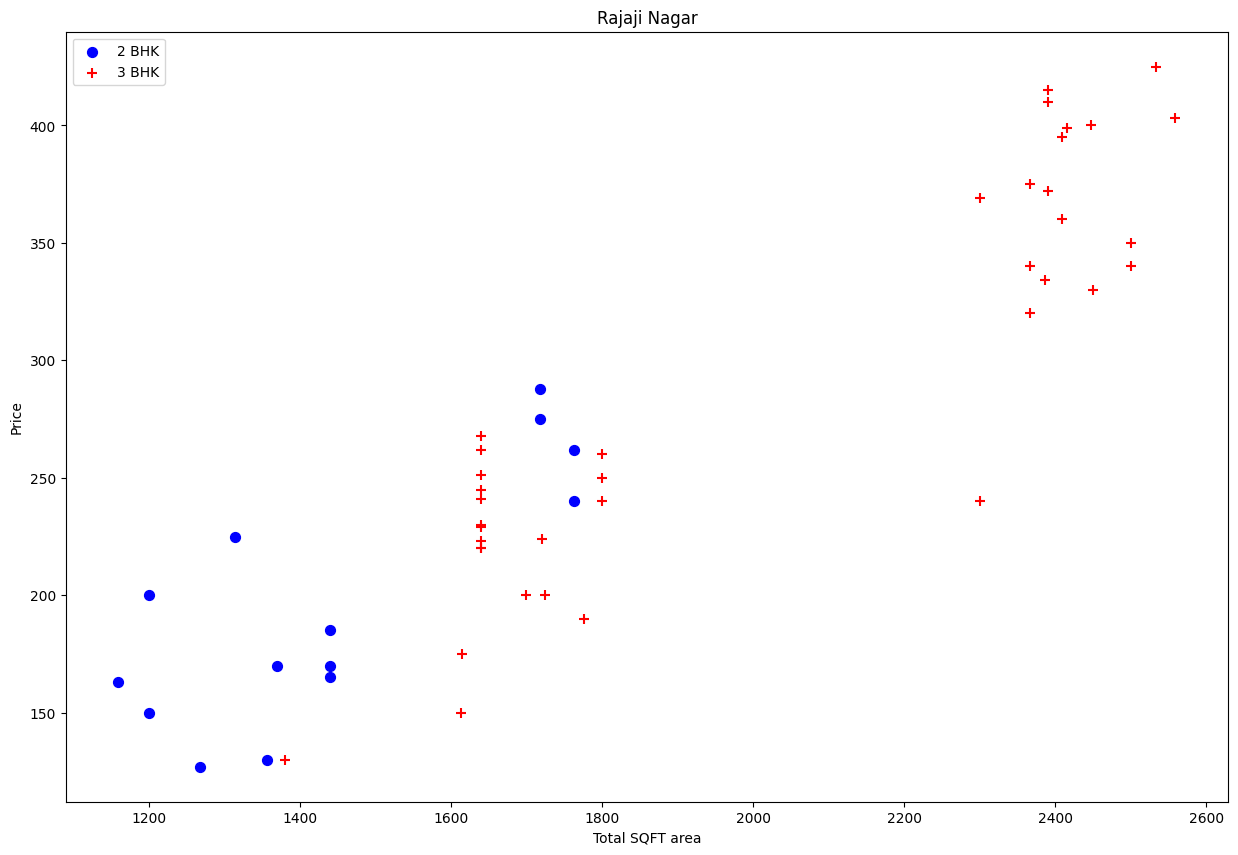

In [44]:
def plot_scatter_plot(df,location):
    BHK2 = df[(df.BHK==2) & (df.location==location)]
    BHK3 = df[(df.BHK==3) & (df.location==location)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,color='red',marker='+',label='3 BHK', s=50)
    plt.xlabel('Total SQFT area')
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_plot(df4,'Rajaji Nagar')

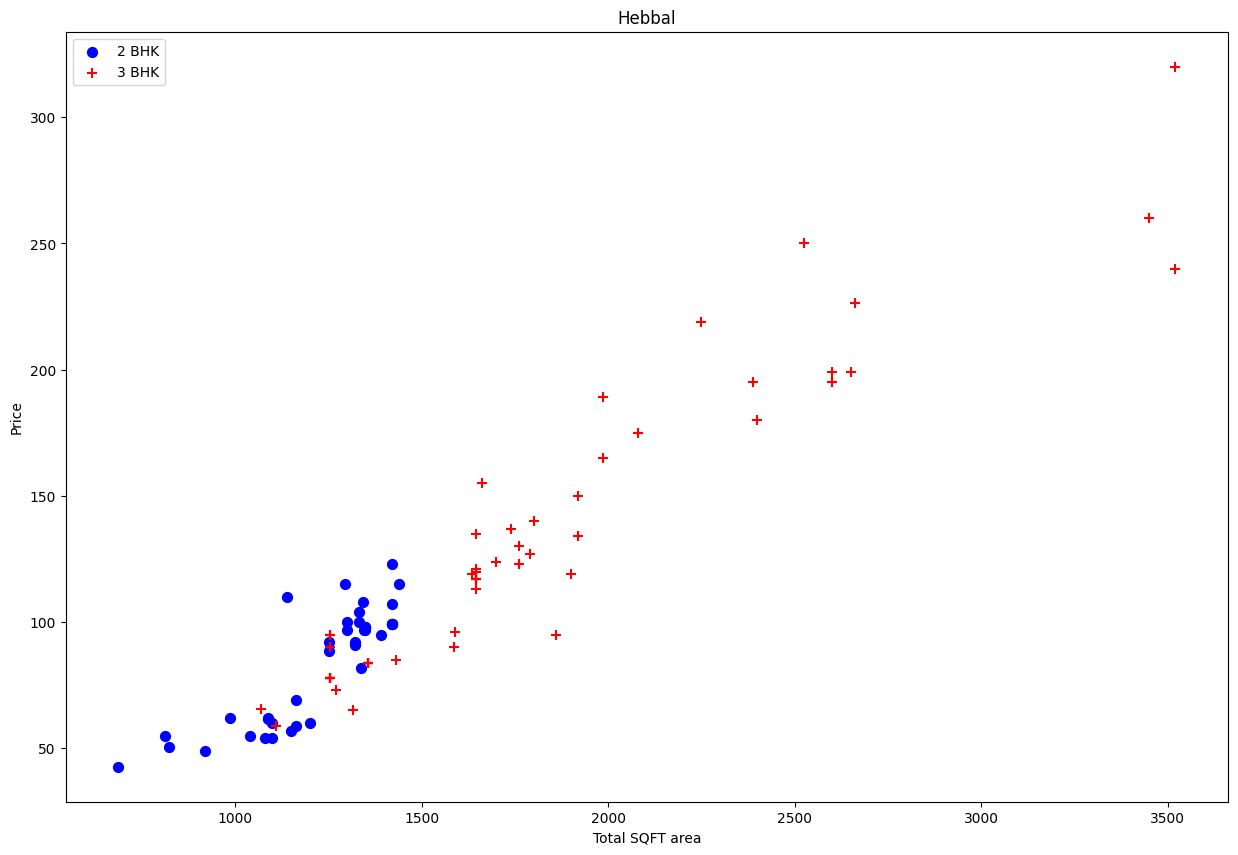

In [45]:
def plot_scatter_plot(df,location):
    BHK2 = df[(df.BHK==2) & (df.location==location)]
    BHK3 = df[(df.BHK==3) & (df.location==location)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(BHK2.total_sqft,BHK2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(BHK3.total_sqft,BHK3.price,color='red',marker='+',label='3 BHK', s=50)
    plt.xlabel('Total SQFT area')
    plt.ylabel("Price")
    plt.title(location)
    plt.legend()
plot_scatter_plot(df4,'Hebbal')

Removing the outliers

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for BHK,bhk_df in location_df.groupby('BHK'):
            bhk_stats[BHK] = {
               'mean': np.mean(bhk_df.price_per_sqft),
               'std': np.std(bhk_df.price_per_sqft),
               'count': bhk_df.shape[0]
            }
        for BHK, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(BHK-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df5 = remove_bhk_outliers(df4)
df5.shape

(7361, 7)

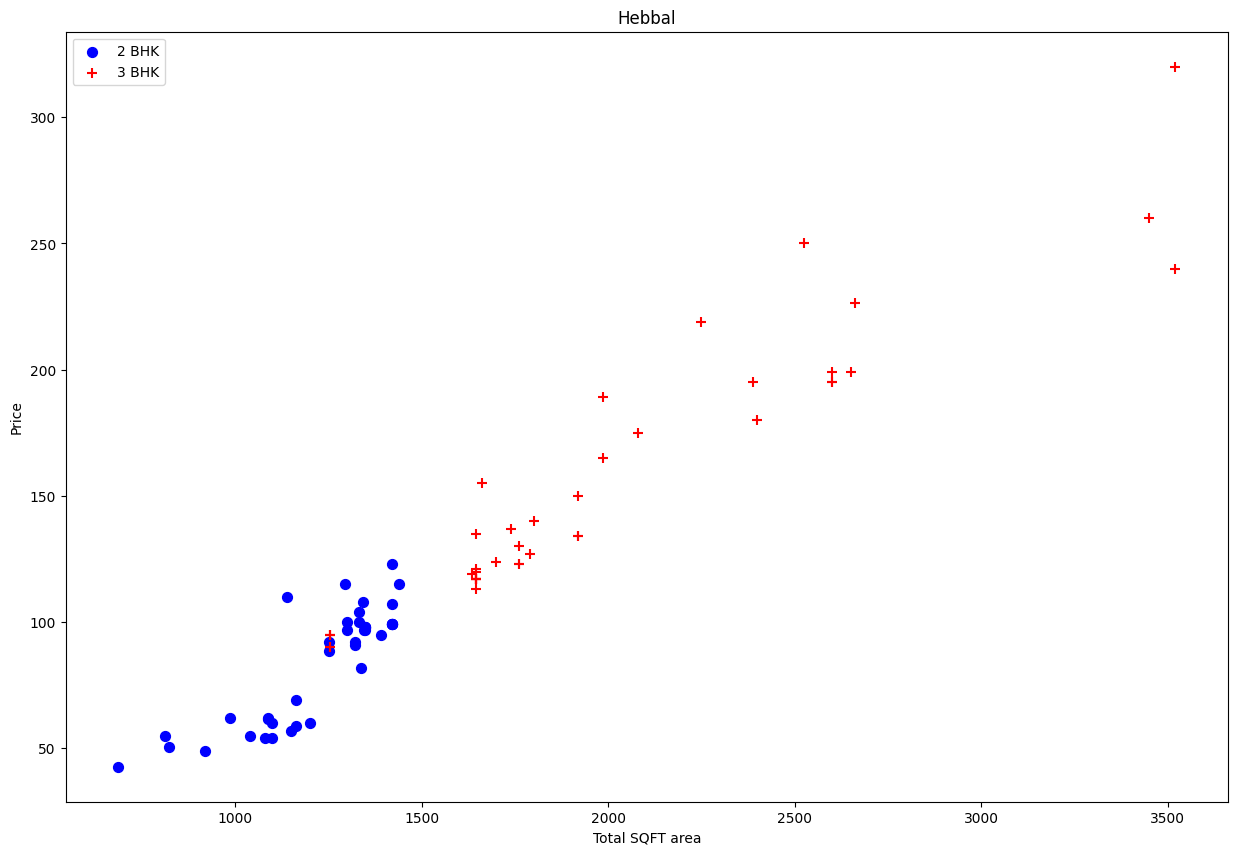

In [47]:
plot_scatter_plot(df5,'Hebbal')

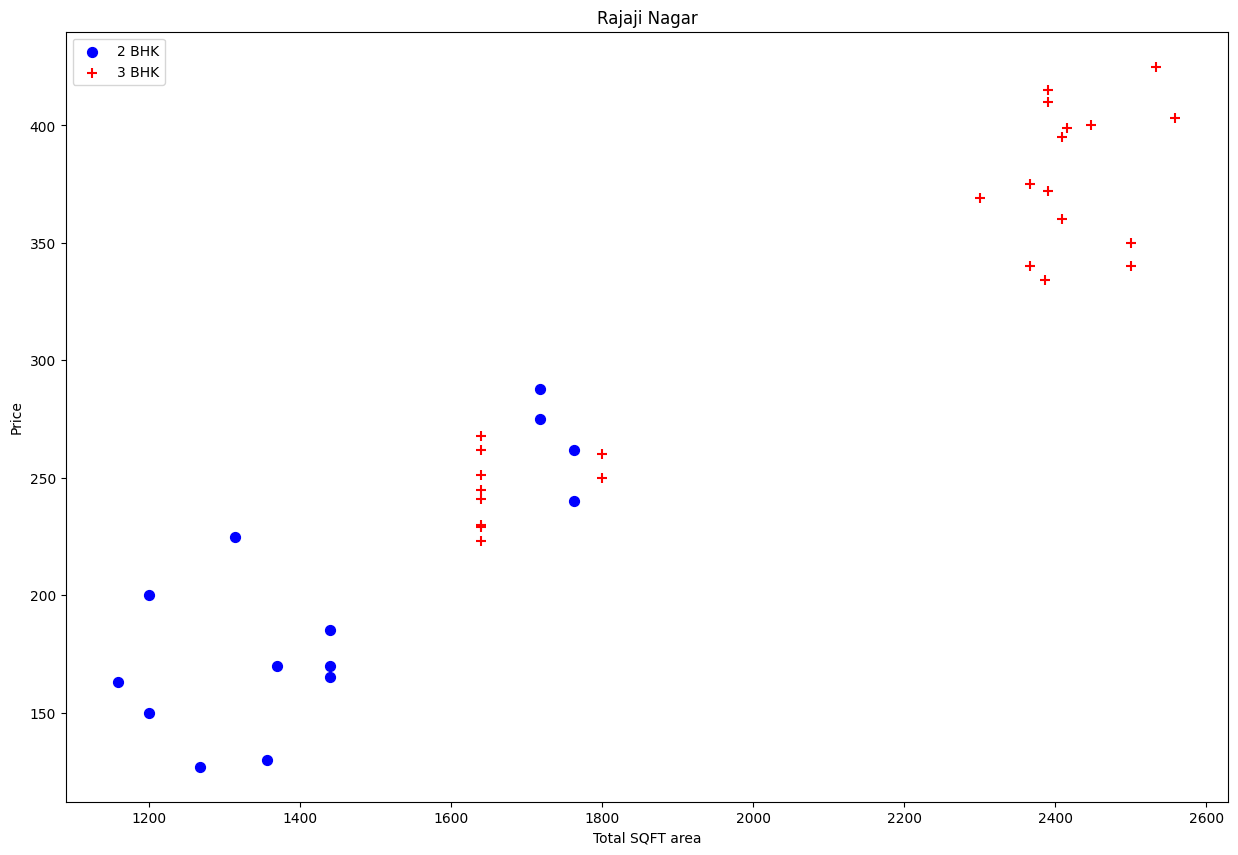

In [48]:
plot_scatter_plot(df5,'Rajaji Nagar')

Text(0, 0.5, 'count')

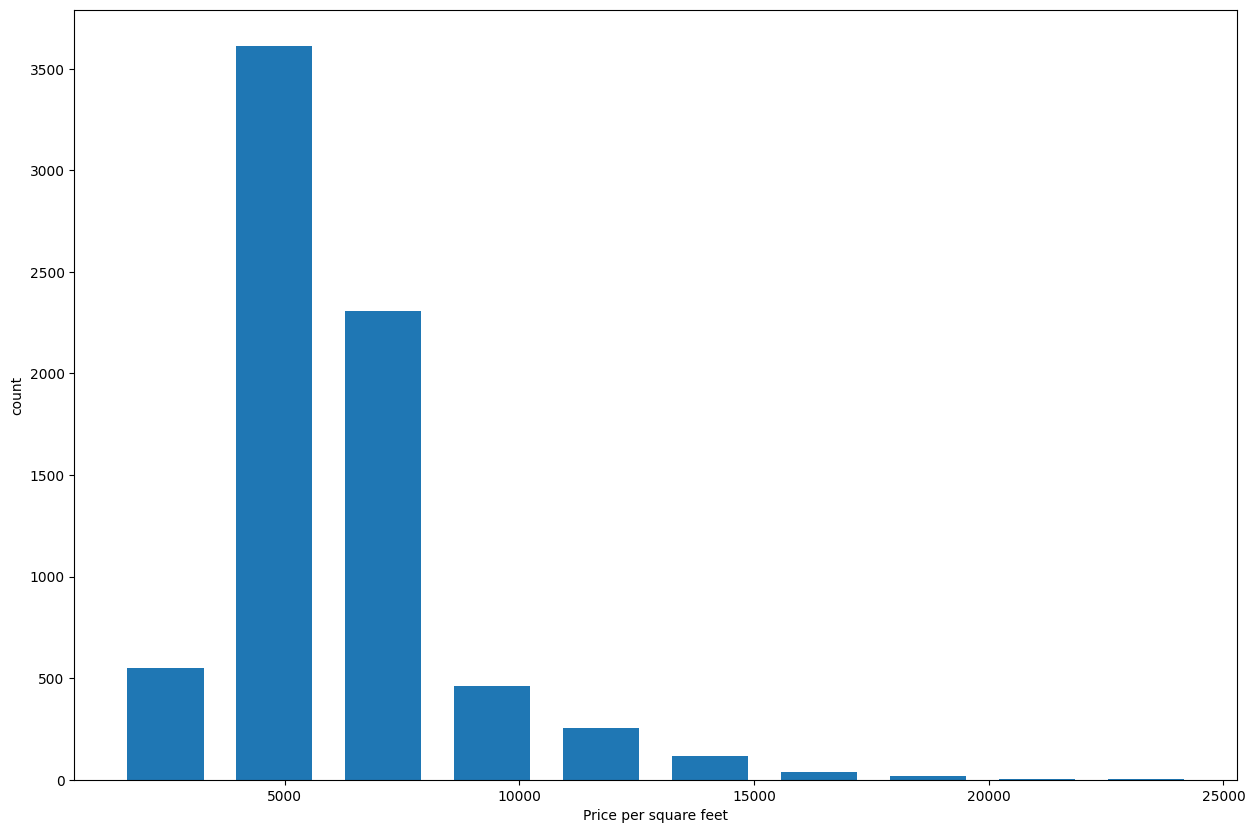

In [49]:
plt.hist(df5.price_per_sqft,rwidth=0.7)
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.xlabel('Price per square feet')
plt.ylabel('count')

In [50]:
#bell shaped curve, that is normal dist

In [51]:
df5.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [52]:
df5[df5.bath>10]

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
5313,Neeladri Nagar,4000.0,12.0,2.0,160.0,10,4000.000000
8543,other,12000.0,12.0,2.0,525.0,10,4375.000000
8632,other,10000.0,16.0,2.0,550.0,16,5500.000000
9365,other,6000.0,12.0,2.0,150.0,11,2500.000000
9697,other,5425.0,13.0,0.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

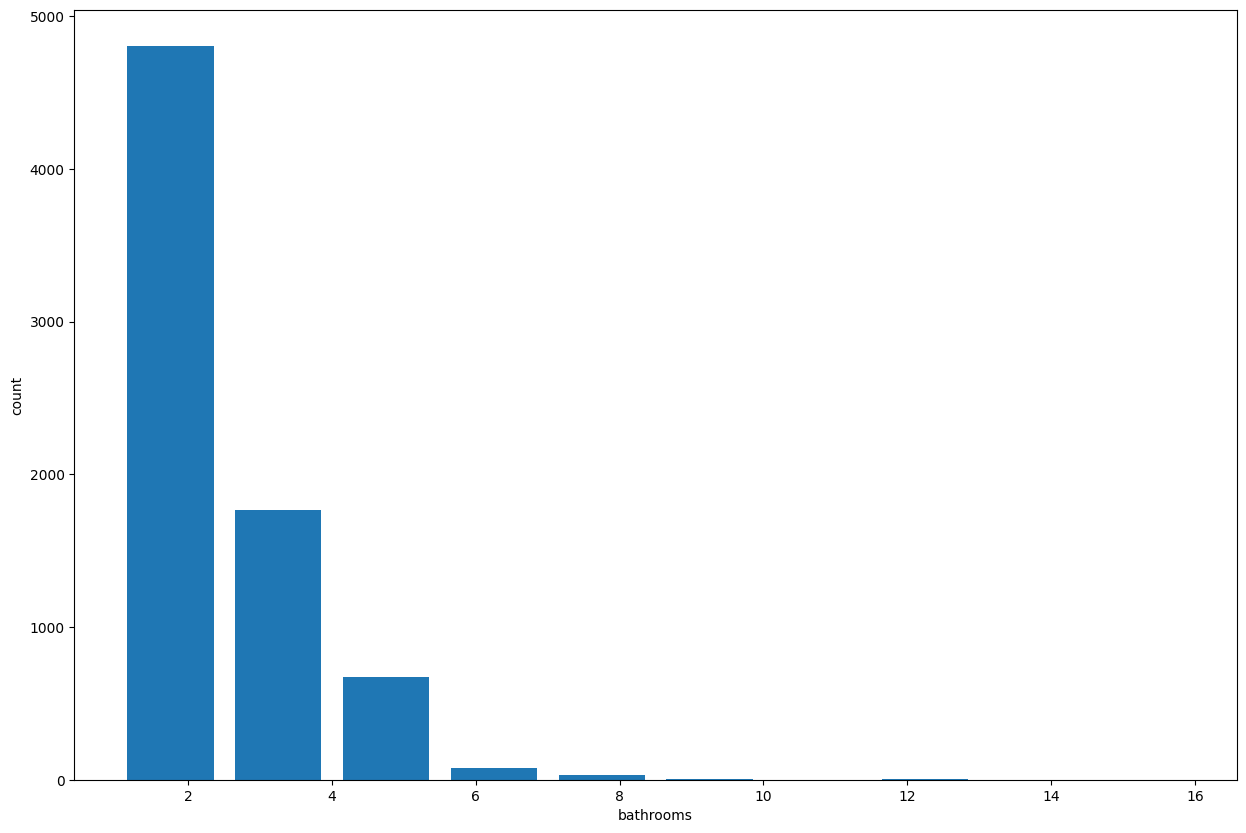

In [53]:
plt.hist(df5.bath,rwidth=0.8)
matplotlib.rcParams['figure.figsize'] = (15,10)
plt.xlabel('bathrooms')
plt.ylabel('count')

In [54]:
df5[df5.bath>df5.BHK+2] #condition from manager

,location,total_sqft,bath,balcony,price,BHK,price_per_sqft
1637,Chikkabanavar,2460.0,7.0,2.0,80.0,4,3252.032520
5274,Nagasandra,7000.0,8.0,2.0,450.0,4,6428.571429
6759,Thanisandra,1806.0,6.0,2.0,116.0,3,6423.034330
8468,other,11338.0,9.0,1.0,1000.0,6,8819.897689


In [55]:
df6=df5[df5.bath<df5.BHK+2]
df6.shape

(7282, 7)

In [56]:
df6.drop(['price_per_sqft'],axis=1,inplace=True)

C:\Users\prama\AppData\Local\Temp\ipykernel_29664\2597891587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6.drop(['price_per_sqft'],axis=1,inplace=True)


In [57]:
df6.head(10)

,location,total_sqft,bath,balcony,price,BHK
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5
10,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3


In [58]:
#machine learning model building

In [59]:
dummies = pd.get_dummies(df6.location)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df7 =  pd.concat([df6,dummies.drop('other',axis=1)],axis=1)
df7.head(10)

,location,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,1.0,428.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,2.0,194.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,3.0,235.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,0.0,130.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,2.0,148.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1st Block Jayanagar,2750.0,4.0,0.0,413.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,1st Block Jayanagar,2450.0,4.0,2.0,368.0,4,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1st Phase JP Nagar,1875.0,3.0,1.0,167.0,3,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1st Phase JP Nagar,1500.0,5.0,2.0,85.0,5,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10,1st Phase JP Nagar,2065.0,4.0,1.0,210.0,3,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df7.drop('location',axis=1,inplace=True)
df7.head(10)

,total_sqft,bath,balcony,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2750.0,4.0,0.0,413.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2450.0,4.0,2.0,368.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1875.0,3.0,1.0,167.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1500.0,5.0,2.0,85.0,5,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,2065.0,4.0,1.0,210.0,3,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [62]:
df7.shape

(7282, 246)

In [63]:
#define the indept and dept variable
X = df7.drop('price',axis=1)
X.head(10)

,total_sqft,bath,balcony,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,1.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1630.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1875.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1200.0,2.0,0.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1235.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,2750.0,4.0,0.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2450.0,4.0,2.0,4,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,1875.0,3.0,1.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,1500.0,5.0,2.0,5,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10,2065.0,4.0,1.0,3,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
'''file_name = 'DF.csv'
X.to_csv(file_name, index = False)'''

"file_name = 'DF.csv'\nX.to_csv(file_name, index = False)"

In [65]:
y = df7.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [67]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)
lr_model.score(X_test,y_test)

0.8735499455116431

In [68]:
#now we will do a k-fold cross validation
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=10)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.87354995, 0.86265836, 0.83133216, 0.86395108, 0.79136159])

In [69]:
#grid search cv

In [70]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'n_jobs': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })
            
            
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py",

,model,best_score,best_params
0,linear_regression,0.844215,{'n_jobs': True}
1,lasso,0.687672,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.715917,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [71]:
#winner is linear regression it has maximum score

In [72]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [73]:
np.where(X.columns=='2nd Stage Nagarbhavi')[0][0]

7

In [74]:
def predict_price(location,sqft,bath,BHK,balcony):
    loc_index =np.where(X.columns==location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    x[3] = balcony
    if loc_index >= 0:
        x[loc_index] = 1
    return lr_model.predict([x])[0]

In [75]:
predict_price('1st Phase JP Nagar',1000,2,2,2)

c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


82.11682041413373

In [76]:
predict_price('1st Phase JP Nagar',1000,3,3,3)

c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


80.80062403319461

In [77]:
predict_price('1st Block Jayanagar',1500,1,1,1)

c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


243.11989996818198

In [78]:
int(predict_price('Indira Nagar',1000,2,2,3))

c:\Users\prama\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


189

In [79]:
df6.location.unique()

array(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       'AECS Layout', 'Abbigere', 'Akshaya Nagar', 'Ambalipura',
       'Ambedkar Nagar', 'Amruthahalli', 'Anandapura', 'Ananth Nagar',
       'Anekal', 'Anjanapura', 'Ardendale', 'Arekere', 'Attibele',
       'BEML Layout', 'BTM 2nd Stage', 'BTM Layout', 'Babusapalaya',
       'Badavala Nagar', 'Balagere', 'Banashankari',
       'Banashankari Stage II', 'Banashankari Stage III',
       'Banashankari Stage V', 'Banashankari Stage VI', 'Banaswadi',
       'Banjara Layout', 'Bannerghatta', 'Bannerghatta Road',
       'Basavangudi', 'Basaveshwara Nagar', 'Battarahalli', 'Begur',
       'Begur Road', 'Bellandur', 'Benson Town', 'Bharathi Nagar',
       'Bhoganhalli', 'Billekahalli', 'Binny Pete', 'Bisuvanahalli',
       'Bommanahalli'

In [80]:
import pickle

In [81]:
pickle.dump(lr_model,open('model.pkl','wb'))

In [82]:
pickle.dump(df7.to_dict(),open('df.pkl','wb'))

In [83]:
pickle.dump(df6,open('df1.pkl','wb'))

In [84]:
print(X.columns)

Index(['total_sqft', 'bath', 'balcony', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)
